# CS210 - Homework #1: Spotify Playlist Analysis
Ilhan Sertelli - 30567

Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn scraping, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset. **You have unlimited freedom to use ChatGPT for this assignment, and we recommend it. Please do not forget to save your ChatGPT chats. Do not use different chats, and do not delete your chat history after you complete the assignment. Besides your notebook, you must also submit for your ChatGPT chat links.**


**In this homework, we offer you 2 ways to get data.**

1 - In this assignment, you will analyze a playlist, and this playlist is available as a table on a website. You can scrape the table from this website, we provide HTML content for this. There is a possibility to retrieve the data using BeautifulSoup. You can also get the table directly from the URL using Selenium, and this way will probably be easier. The homework will start with this part and if you successfully capture the data and use it in the homework, you will start with 25 points.

2 - If you do not want to deal with scraping, we will also provide you with the CSV version of the dataset, and you can use it directly. In this case, naturally you will not have completed the scraping part, but you will still be able to complete the remaining parts of the assignment, and you will not receive any points for the scraping part.




Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.


In [1]:
!pip install bs4
!pip install requests
!pip install time
!pip install sys

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests 
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

## Q1: Scraping  (25 points)

If you want to scrape the playlist, you can retrieve the data using [this playlist analyzer website](https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG). Here, you should take the Playlist Table, which contains the songs' information, and convert it to DataFrame. As we mentioned at the beginning of the assignment, using Selenium may be a more logical solution since the content of the site is dynamic. But you are also free to use BeautifulSoup, or read the file directly and start data analysis. If you want to use BeautifulSoup, we provided the static version of the webpage. 

In [2]:
#SCRAPING WAY - 25 POINTS

#Opened the static website
with open('CS210 - Homework 1 - for BeautifulSoup.html', 'r', encoding='utf-8') as file:
    html_content = file.read()
soup = bs4.BeautifulSoup(html_content, "html.parser")

firstRow = []
dataList = []
# Extracting the elements of the table
tableHead = soup.find("table", {"class": "info-table"}).find("thead").findAll("th") 
tableBody = soup.find("table", {"class": "info-table"}).find("tbody").findAll("tr")

# Creating a list of head elements of the table
for elem in tableHead:
    firstRow.append(elem.get_text())

# Creating the list composed of dictionaries of whole table's elements
for j in tableBody:
    dataDict = {}
    cell = []
    tableCell = j.findAll("td")
    for k in tableCell:
        cell.append(k.get_text().strip()) # To avoid the whitespace characters
    for idx in range(len(firstRow)):
        # Numerical columns will be converted to int from str
        if (idx == 3 or idx == 4 or idx == 10 or idx == 11 or idx == 12 or idx == 13 or idx == 14 or idx == 15 or idx == 16 or idx == 17 or idx == 19):
            if idx != 17: 
                dataDict[firstRow[idx]] = int(cell[idx])
            else: # Cutting the " db" from the "Loud" column and converting it to integer
                dataDict[firstRow[idx]] = int(cell[idx][0:len(cell[idx])-3])
        else:
            dataDict[firstRow[idx]] = cell[idx]
            
    dataList.append(dataDict)  

# Creating the dataframe
df = pd.DataFrame(dataList)
pd.set_option('display.max_columns', None) # To see all columns
pd.set_option('display.max_rows', None) # To see all rows
df

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,73,62,61,31,25,0,10,-11,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,43,62,34,18,20,0,10,-5,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A
3,4,Instant Crush (feat. Julian Casablancas),"Daft Punk,Julian Casablancas",78,110,"electro, filter house, rock, indie rock","Hip Hop, Electronic, Rock",Random Access Memories,2013-05-20,05:37,78,59,4,62,52,0,0,-10,A#/B♭ Minor,4,2023-10-11,2cGxRwrMyEAp8dEbuZaVv6,Columbia,3A
4,5,I Know The End,Phoebe Bridgers,0,111,"indie pop, la indie, pov: indie",Pop,Punisher,2020-06-18,05:44,33,32,32,2,26,0,20,-10,C♯/D♭ Major,4,2023-10-11,3cr3oAP4bQFNjZBV7ElKaB,Dead Oceans,3B
5,6,Taro,alt-J,0,172,"indie rock, indietronica, modern alternative r...","Rock, Pop",An Awesome Wave,2012-05-28,05:14,35,48,77,0,29,0,0,-11,F Major,4,2023-10-11,36ylLzMtvJ2CItc7bN4TcF,Infectious,7B
6,7,Close Your Eyes,The All-American Rejects,41,92,"alternative metal, modern rock, neo mellow, ne...","Metal, Rock, Folk/Acoustic, Pop",Sweat,2017-07-07,04:27,47,63,7,0,8,0,0,-8,C♯/D♭ Major,4,2023-10-11,4HM8tkHTQ6JVSMfsJOrcAW,Interscope,3B
7,8,Hold No Grudge - Bonus Track,Lorde,51,155,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Solar Power (Deluxe Edition),2021-11-05,04:28,66,34,88,0,49,20,0,-13,G Major,4,2023-10-11,188rKyWMsC4WsKKZ85lnUO,Universal Music New Zealand Limited,9B
8,9,Balaclava,Arctic Monkeys,63,138,"garage rock, modern rock, permanent wave, rock...",Rock,Favourite Worst Nightmare,2007-04-22,02:51,41,81,0,0,76,0,30,-4,B Minor,4,2023-10-11,0ftMOhVfFm5Wbs5sZdEtsC,Domino Recording Co,10A
9,10,Keep On,Portugal. The Man,47,140,"indie rock, indietronica, modern alternative r...","Rock, Pop",Woodstock,2017-06-16,03:23,67,68,25,5,78,0,0,-7,C Major,4,2023-10-11,4wnqFGTV4268VQgCG1jn7J,Atlantic Records,8B


In [3]:
#READ THE DATA DIRECTLY - 0 PTS

Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## Q2: Exploring the Dataset (35 points)

Since we complete the scraping, we can finally start deep-diving into the dataset. Now, follow the instructions.

In [4]:
#2pts - show the first 3 rows
df.head(3)

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,73,62,61,31,25,0,10,-11,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,43,62,34,18,20,0,10,-5,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A


In [5]:
#1pts - show the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 326 non-null    object
 1   Song              326 non-null    object
 2   Artist            326 non-null    object
 3   Popularity        326 non-null    int64 
 4   BPM               326 non-null    int64 
 5   Genres            326 non-null    object
 6   Parent Genres     326 non-null    object
 7   Album             326 non-null    object
 8   Album Date        326 non-null    object
 9   Time              326 non-null    object
 10  Dance             326 non-null    int64 
 11  Energy            326 non-null    int64 
 12  Acoustic          326 non-null    int64 
 13  Instrumental      326 non-null    int64 
 14  Happy             326 non-null    int64 
 15  Speech            326 non-null    int64 
 16  Live              326 non-null    int64 
 17  Loud            

In [6]:
#2pts - give the statistical summary of numerical columns
df.describe()

,Popularity,BPM,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Time Signature
count,326.00000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,50.41411,122.990798,54.895706,60.478528,28.245399,13.380368,43.625767,0.858896,12.055215,-8.128834,3.929448
std,23.10292,25.101822,14.852345,20.385164,29.670725,24.219816,22.836027,3.906409,12.615376,3.079755,0.320467
min,0.00000,66.000000,11.000000,10.000000,0.000000,0.000000,4.000000,0.000000,0.000000,-20.000000,1.000000
25%,40.00000,106.000000,45.000000,45.000000,2.000000,0.000000,26.000000,0.000000,0.000000,-10.000000,4.000000
50%,55.00000,122.500000,55.000000,61.000000,17.000000,0.000000,41.000000,0.000000,10.000000,-8.000000,4.000000
75%,66.00000,138.000000,66.000000,77.000000,51.750000,13.750000,60.000000,0.000000,17.500000,-6.000000,4.000000
max,93.00000,200.000000,89.000000,98.000000,96.000000,95.000000,98.000000,40.000000,80.000000,-2.000000,4.000000


Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [7]:
#5pts 

# Return a dictionary that counts the number of appearance of each genre
def countGenre(data):
    count = {}
    temp_list = data
    for i in temp_list:
        temp = i["Genres"].split(",")
        for j in temp:
            temp[temp.index(j)] = j.strip()
        for k in temp:
            if k not in count:
                count[k] = 1
            else:
                count[k] += 1
    
    return count

# Converts the string of genre data to a list and returns the list of each row's genre list
def getGenre(data):
    temp_list = data
    rowGenreList = []
    for i in temp_list:
        temp = i["Genres"].split(",")
        for j in temp:
            temp[temp.index(j)] = j.strip()
        rowGenreList.append(temp)
        
    return rowGenreList

# Returns the popularity list of each row
def getPopularityList(data):
    temp_list = data
    rowPopularityList = []
    for i in temp_list:
        temp = i["Popularity"]
        rowPopularityList.append(temp)
    
    return rowPopularityList
    
count = countGenre(dataList)

top_10 = {}
# Creating the most common genres' dictionary
for j in range(10):
    maximum = 0
    for genre in count:
        if count[genre] > maximum:
            maximum = count[genre]
    for s in count:
        if count[s] == maximum:
            top_10[s] = maximum
            count[s] = 0
            break

num = 1
for y in top_10:
    result = "{}. {} {}".format(num, y, top_10[y])
    print(result)
    num += 1
    


1. indie rock 113
2. modern rock 104
3. art pop 80
4. rock 74
5. indie pop 64
6. chamber pop 58
7. permanent wave 48
8. pov: indie 41
9. indietronica 38
10. garage rock 37


Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

In [8]:
#6pts

# Split the genres in the 'Genres' column
df['Genres'] = df['Genres'].str.split(', ')

# Explode the DataFrame based on the 'Genres' column
df_exploded = df.explode('Genres')

# Count the occurrences of each genre
genre_counts = df_exploded['Genres'].value_counts()

# Filter genres that appear more than 10 times
popular_genres = genre_counts[genre_counts > 10].index

# Filter the DataFrame to include only rows with popular genres
df_filtered = df_exploded[df_exploded['Genres'].isin(popular_genres)]

# Group by genre and calculate the average popularity score
genre_avg_popularity = df_filtered.groupby('Genres')['Popularity'].mean()

# Get the top 5 genres based on average popularity
top_genres = genre_avg_popularity.nlargest(5)

# Display the top genres with their popularity score
print(top_genres)

Genres
permanent wave     67.916667
pop                65.823529
sheffield indie    65.645161
garage rock        65.027027
la indie           62.076923
Name: Popularity, dtype: float64


Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Here you need to categorize the music according to popularity and BPM.There will be two new columns named "Popularity_Category" and "BPM_Category". Let it be "High" if its popularity is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For BPM, if it is below 100, call it "Slow", if it is between 100 and 130 (inclusive), call it "Medium", and if it is greater than 130, let it be "Fast". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'BPM_Category'.

In [9]:
#5pts 
popularityArray = df["Popularity"] # Created a list composed of popularity data of each row
bpmArray = df["BPM"] # Created a list composed of BPM data of each row
popCol = []
bpmCol = []

popHighCount = 0
popMidCount = 0
popLowCount = 0
bpmSlowCount = 0
bpmMidCount = 0
bpmFastCount = 0

for i in popularityArray:
    pop = ""
    if i > 66:
        pop = "High"
        popHighCount += 1 
    elif i >= 40:
        pop = "Medium"
        popMidCount += 1 
    else:
        pop = "Low"
        popLowCount += 1 
    popCol.append(pop)
    
for j in bpmArray:
    speed = ""
    if j < 100:
        speed = "Slow"
        bpmSlowCount += 1
    elif j <= 130:
        speed = "Medium"
        bpmMidCount += 1
    else:
        speed = "Fast"
        bpmFastCount += 1
    bpmCol.append(speed)
    
df["Popularity_Category"] = popCol # Creating a new column named "Popularity Category"
df["BPM_Category"] = bpmCol # Creating a new column named "Popularity Category"

popResult = "For Popularity Category:\nHigh: {}\nMedium: {}\nLow: {}".format(popHighCount, popMidCount, popLowCount)
bpmResult = "For BPM Category:\nSlow: {}\nMedium: {}\nFast: {}".format(bpmSlowCount, bpmMidCount, bpmFastCount)

print(popResult, "\n")
print(bpmResult)


For Popularity Category:
High: 79
Medium: 170
Low: 77 

For BPM Category:
Slow: 59
Medium: 160
Fast: 107


Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset. In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [10]:
#3pts
filtered_data = df[df["Song"] == "Crying Lightning"]
filtered_data

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Popularity_Category,BPM_Category
0,1,Crying Lightning,Arctic Monkeys,75,107,"[garage rock, modern rock, permanent wave, roc...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,High,Medium


Let's do a more advanced filtering operation. Display the name of the most common album among the tracks that have a "High" popularity, a "Fast" BPM, and are also above the 75th percentile in loudness.



In [11]:
#6pts
percent_75 = df["Loud"].quantile(0.75) 
filtered_data = df[(df["Popularity_Category"] == "High") & (df["BPM_Category"] == "Fast") & (df["Loud"] > percent_75)]

value_counts = filtered_data['Album'].value_counts()

most_common_element = value_counts.idxmax()
print(f"The most common album among the tracks that satisfy the given criterias is: {most_common_element}")

The most common album among the tracks that satisfy the given criterias is: Favourite Worst Nightmare


Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



In [12]:
#5pts
threshold = df["Popularity"].quantile(0.9)

# Filter the DataFrame for the top 10%
top_10_percent = df[df["Popularity"] >= threshold]
commonCamelot = top_10_percent["Camelot"].mode()[0]

print("The most common Camelot code among the tracks that belong to the top 10% in terms of popularity is:")
print(commonCamelot)

The most common Camelot code among the tracks that belong to the top 10% in terms of popularity is:
10B


## Q3: Visualization and Analysis (40 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a subplot matrix.
- Create a histogram for the 'Popularity_Category' variable with a bin size of 30, the color should be red.
- Set the title of the first subplot as 'Popularities.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'Popularity Category.'
- Set the boundaries for the y-axis as 0 to 200.
- Repeat the above steps for the 'BPM_Category' variable, creating a histogram with a bin size of 30 in the second subplot, the color should be blue.
- Set the title of the second subplot as 'BPM Categories.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'BPM Category.'
- Set the boundaries for the y-axis as 0 to 200.

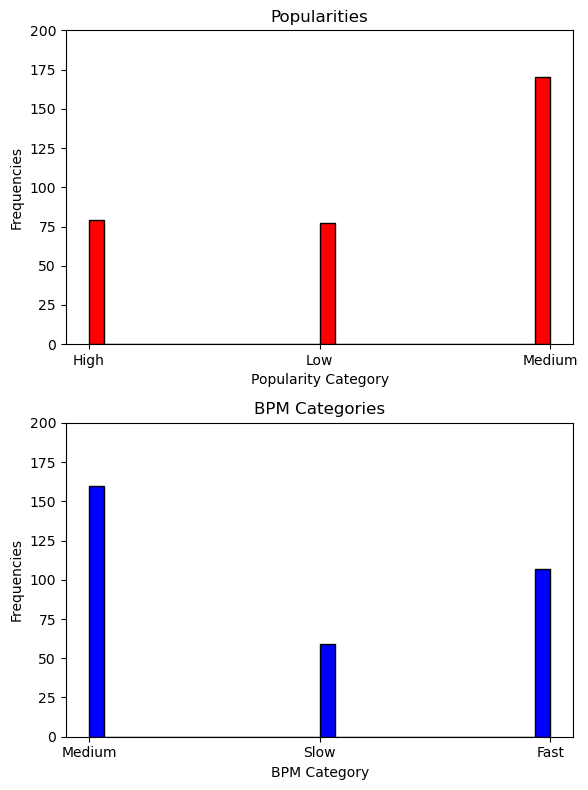

In [13]:
#2pts

# Create a subplot matrix with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

# Create histogram for 'Popularity_Category' in the first subplot
axes[0].hist(df['Popularity_Category'], bins=30, color='red', edgecolor='black')
axes[0].set_title('Popularities')
axes[0].set_ylabel('Frequencies')
axes[0].set_xlabel('Popularity Category')
axes[0].set_ylim(0, 200)

# Create histogram for 'BPM_Category' in the second subplot
axes[1].hist(df['BPM_Category'], bins=30, color='blue', edgecolor='black')
axes[1].set_title('BPM Categories')
axes[1].set_ylabel('Frequencies')
axes[1].set_xlabel('BPM Category')
axes[1].set_ylim(0, 200)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, think that which plot would be the appropriate choice.

Visualize the relationship between the two according to the plot you choose. Loudness bounds must be -2-20 and energy limits must be 0-100. 

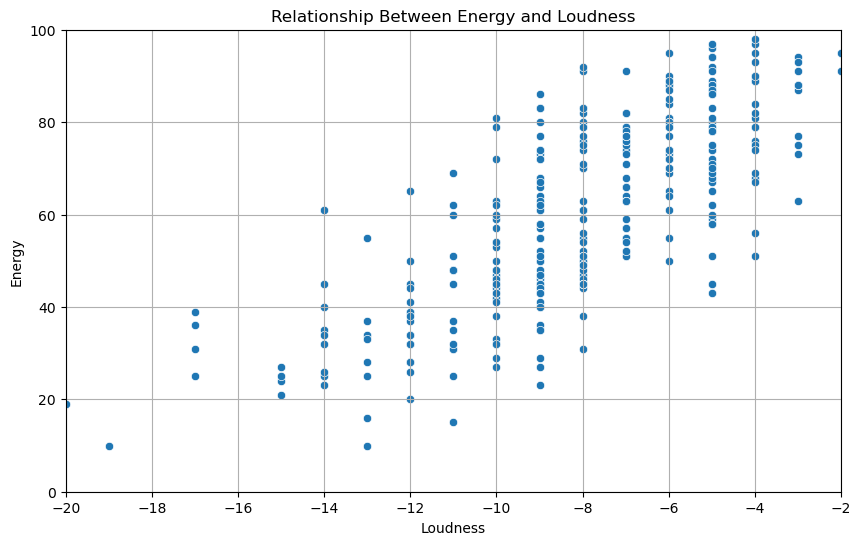

In [14]:
#3pts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loud', y='Energy', data=df)

# Set axis limits
plt.xlim(-20, -2)
plt.ylim(0, 100)

# Set axis labels and title
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Relationship Between Energy and Loudness')

# Show the plot
plt.grid(True)
plt.show()

Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


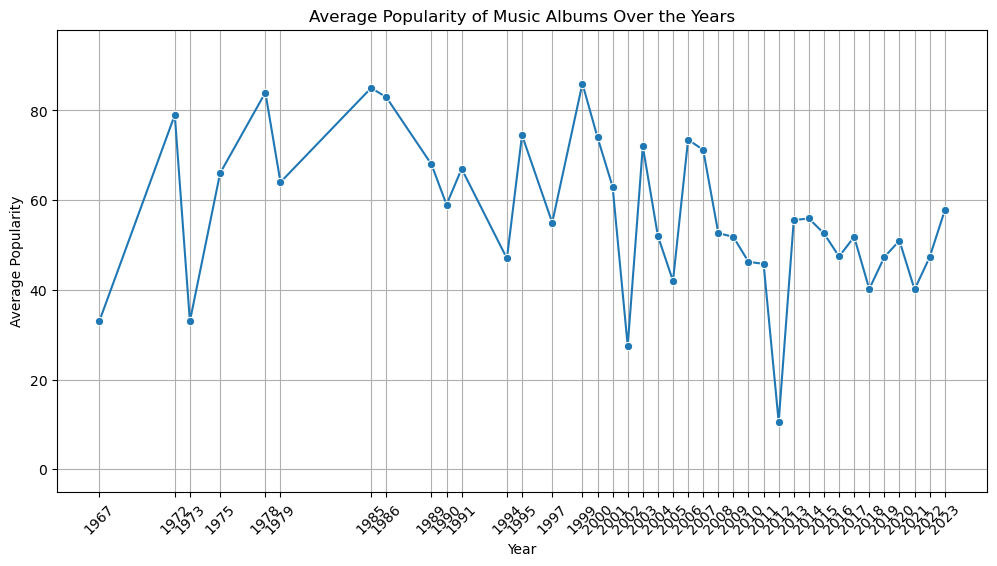

In [15]:
#6pts
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame named 'df' with columns 'Album Date' and 'Popularity'
# Replace this with your actual DataFrame

# Create a copy of the DataFrame
mock_df = df.copy()

# Extract the year from the 'Album Date' column and convert it to integers
mock_df['Album Date'] = mock_df['Album Date'].str[:4].astype(int)

# Calculate the average popularity for each year
average_popularity_by_year = mock_df.groupby('Album Date')['Popularity'].mean().reset_index()

# Create a line plot with markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Album Date', y='Popularity', data=average_popularity_by_year, marker='o')

# Set y-axis limits
min_popularity = df['Popularity'].min() - 5
max_popularity = df['Popularity'].max() + 5
plt.ylim(min_popularity, max_popularity)
plt.xticks(rotation=45)

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Over the Years')

# Show all years on the x-axis
plt.xticks(average_popularity_by_year['Album Date'])

# Show the plot
plt.grid(True)
plt.show()


Now, let's create a plot that illustrates the average popularity of music albums across the months of the year. The plot should be in the form of a line graph with markers, with the x-axis representing the months (in a custom order from January to December) and the y-axis representing the average popularity. Make sure to include appropriate labels and set the y-axis limits to be 5 units below the minimum popularity and 5 units above the maximum popularity. Additionally, rotate the x-axis tick values by 45 degrees for better readability. 

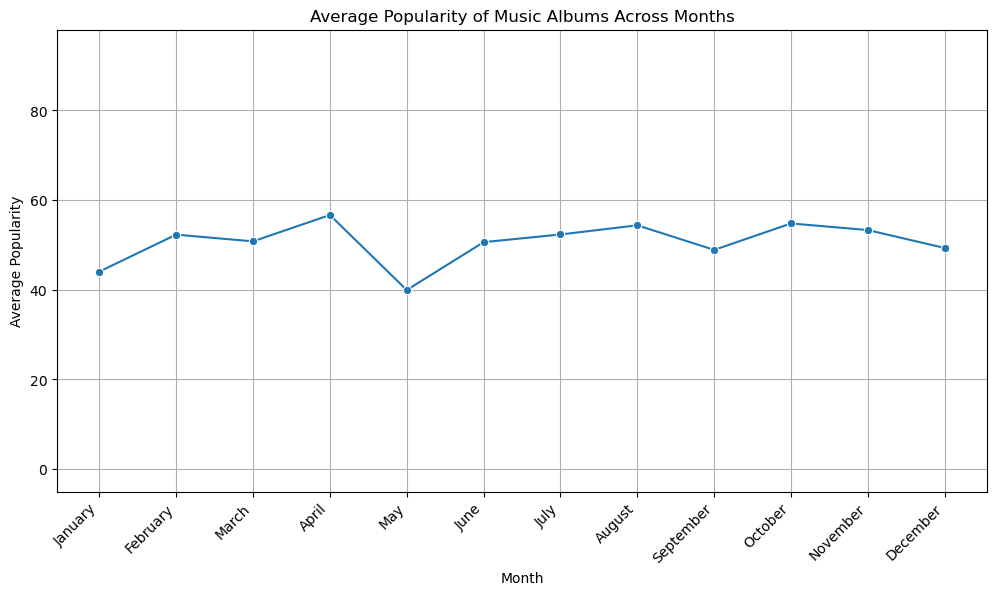

In [16]:
#7pts
mock_df = df.copy()
months = []

"""
In that question, I encountered with an issue. There are some Album Dates that
contain 00 as Month and 00 as Days. I assumed them as 01 and solved the question
accordingly
"""

monthName = {"00": "January", "01": "January", "02": "February", "03": "March", "04": "April", "05": "May"
            ,"06": "June", "07": "July", "08": "August", "09": "September", "10": "October", "11": "November",
            "12": "December"}
orderMonth = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Extract the month from the 'Album Date' column and convert it to month names
for elem in mock_df["Album Date"]:
        months.append(monthName[elem[5:7]])

mock_df["Month Name"] = months
mock_df['Month Name'] = pd.Categorical(mock_df['Month Name'], categories=orderMonth, ordered=True)
# Calculate the average popularity for each month
average_popularity_by_month = mock_df.groupby('Month Name')['Popularity'].mean().reset_index()

# Create a line plot with markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month Name', y='Popularity', data=average_popularity_by_month, marker='o', sort = False)

# Set y-axis limits
min_popularity = df['Popularity'].min() - 5
max_popularity = df['Popularity'].max() + 5
plt.ylim(min_popularity, max_popularity)

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Across Months')

# Avoid x-axis label overlap by rotating them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.show()

Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

Visualize and compare the BPM (Beats Per Minute) levels in the music of four different artists: Lorde, Big Thief, Wolf Alice and Phoebe Bridgers. The data is presented in a countplot with three categories for BPM levels: Slow, Medium, and Fast. Each artist's contribution to each BPM category is shown using a different color. The y-axis represents the frequency of songs falling into each BPM category. Set the y-axis limits to a range of 0 to 10 for better clarity.

You already see the answer below as an example, you can use inferno as the color code. There may be slight differences in styling, but we expect a very similar answer. Please be careful with the order of x-axis.


<img src="https://i.imgur.com/EAk2mcB.png" alt="barplot-210" border="0" width="500">


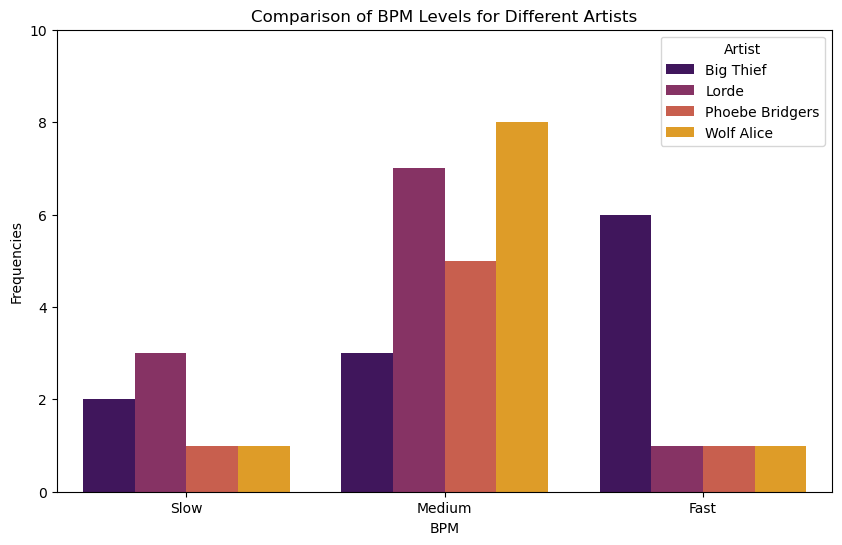

In [17]:
# Specify the order of x-axis (BPM categories) for better clarity
bpm_order = ['Slow', 'Medium', 'Fast']

# Filter the DataFrame for the selected artists
selected_artists = ['Big Thief', 'Lorde', 'Phoebe Bridgers', 'Wolf Alice']
filtered_df = df[df['Artist'].isin(selected_artists)]

# Order the display of artists alphabetically
artist_order = sorted(filtered_df['Artist'].unique())

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='BPM_Category', hue='Artist', data=filtered_df, order=bpm_order, hue_order=artist_order, palette='inferno')

# Set y-axis limits for better clarity
plt.ylim(0, 10)

# Set axis labels and title
plt.xlabel('BPM')
plt.ylabel('Frequencies')
plt.title('Comparison of BPM Levels for Different Artists')

# Show the plot
plt.show()


We are approaching the end. Visualize the aggregated Energy and Acoustic values of songs categorized by the top 10 most common genres in the dataset.

The final visualization should be a stacked bar chart where each bar represents one of the top 10 genres, and the height of the colored segments within each bar denotes the sum of Energy and Acoustic values for songs in that genre. This allows for a quick comparative view of how energetic or acoustic songs from each of the top genres tend to be.

You already see the answer below as an example, you can use ['#669bbc', '#003049'] colors. There may be slight differences in styling, but we expect a very similar answer.


<img src="https://i.imgur.com/eM0q688.png" alt="barplot-210" border="0" width="500">


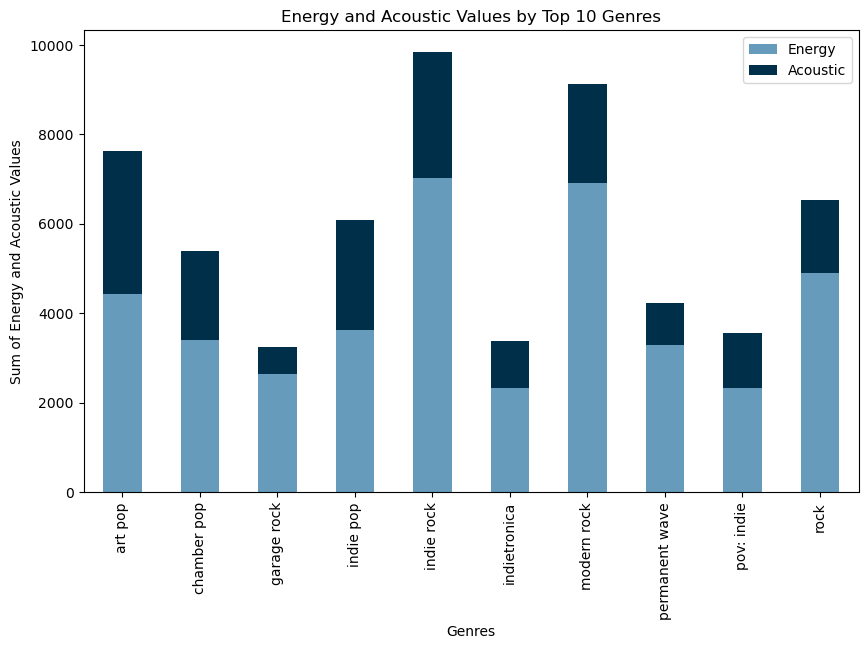

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Explode the DataFrame based on the 'Genres' column
df_exploded = df.explode('Genres')

# Step 2: Group by genre and sum the 'Energy' and 'Acoustic' values
df_grouped = df_exploded.groupby('Genres')[['Energy', 'Acoustic']].sum()

# Step 3: Get the top 10 genres
top_10_genres = df_exploded['Genres'].value_counts().nlargest(10).index

# Step 4: Filter the DataFrame for the top 10 genres
df_top_10 = df_grouped.loc[top_10_genres]

# Step 5: Sort genres alphabetically
df_top_10 = df_top_10.sort_index()

# Step 6: Plot the stacked bar chart
colors = ['#669bbc', '#003049']
ax = df_top_10.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Step 7: Customize the plot
ax.set_title('Energy and Acoustic Values by Top 10 Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Sum of Energy and Acoustic Values')
ax.legend(['Energy', 'Acoustic'], loc='upper right')

# Step 8: Show the plot
plt.show()


Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

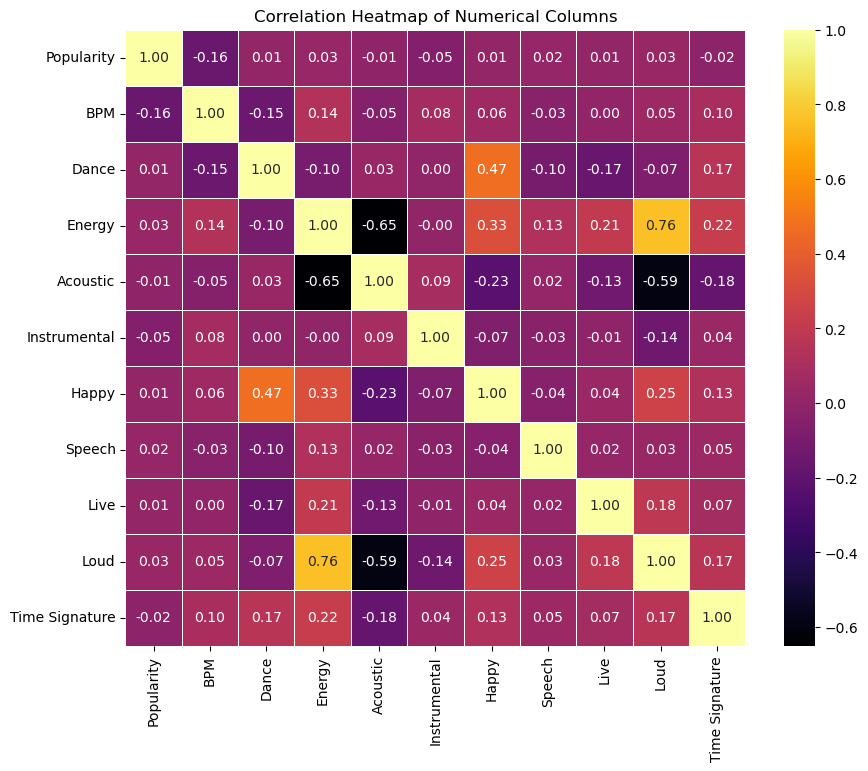

In [19]:
#4pts
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)

# Set title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()

And we will conclude the assignment with a simple question. Though this question isn't directly related to visualization, you must retrieve and print the HTML content of the chat URL you used in ChatGPT using BeautifulSoup. 

In [23]:
#4pts
print("HTML content: ")

with open('ChatGPT.html', 'r', encoding='utf-8') as file:
    html_content = file.read()
    
soup = bs4.BeautifulSoup(html_content, "html.parser")

for tag in soup.findAll('p'):
    print(tag)

HTML content: 
<p>You can create a DataFrame by web scraping using BeautifulSoup and the Pandas library in Python. BeautifulSoup is a powerful library for parsing HTML and XML documents, and Pandas is a widely used library for data manipulation. Here's a step-by-step guide on how to scrape a website and create a DataFrame:</p>
<p>Now, you have a DataFrame that contains the scraped data. You can perform various data manipulation and analysis tasks using Pandas.</p>
<p>(Optional) Save the DataFrame to a CSV file:</p>
<p>Remember to adjust the code to match the structure and layout of the web page you are scraping. Web scraping should be done responsibly, respecting the website's terms of service and robots.txt file, and you should consider implementing error handling and user-agent headers in your requests to avoid overloading the server with requests.</p>
<p>To find and scrape HTML elements by their <code>id</code> attribute using BeautifulSoup, you can use the <code>find()</code> or <c

Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify data. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG?si=1c69c078d81f47f5

See you later!
    
<img src="https://i.imgur.com/KSbQFe7.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

